In [1]:
import pandas as mulgul_engpd

mulgul_eng = mulgul_engpd.read_csv('mulgul_eng.csv',nrows=30000) # read English data
mulgul_eng

,text,label
0,comment expected barack obama members fyf fuky...,1
1,post votes hillary already,1
2,demonstrators gathered last night exercising c...,1
3,dozen politically active pastors came private ...,0
4,rs sarmat missile dubbed satan replace ss flie...,1
...,...,...
29995,washington reuters u president donald trump fa...,0
29996,thank goodness mandatory financial disclosures...,1
29997,washington reuters vice president mike pence t...,0
29998,share joe giambrone everything printed year do...,1


In [2]:
import pandas as mulgul_engpd

mulgul_ger = mulgul_engpd.read_csv('mulgul_german.csv',nrows=30000)
mulgul_ger

,Body,Fake
0,sondierungsgespr che union spd endeten komprom...,1
1,medizinisch offiziell best tigt milit r rztlic...,1
2,z he verhandlungen freien demokraten k nnen zu...,1
3,treibt immer sp t nacht herum joachim sauer be...,1
4,parteivorstand dr ckt nochmal auge nachdem noa...,1
...,...,...
29995,krisengebeutelte europ ische automobilmarkt ta...,0
29996,us kabelkonzern liberty global bieterrennen ka...,0
29997,angesichts tiefen rezession euro zone fasst ez...,0
29998,commerzbank fallen n chsten jahren voraussicht...,0


In [3]:
mulgul_eng['label'].value_counts()

0    15432
1    14568
Name: label, dtype: int64

In [4]:
mulgul_ger['Fake'].value_counts()

0    27960
1     2040
Name: Fake, dtype: int64

In [5]:
mulgul_engX = mulgul_eng.drop('label',axis=1)
mulgul_engX

,text
0,comment expected barack obama members fyf fuky...
1,post votes hillary already
2,demonstrators gathered last night exercising c...
3,dozen politically active pastors came private ...
4,rs sarmat missile dubbed satan replace ss flie...
...,...
29995,washington reuters u president donald trump fa...
29996,thank goodness mandatory financial disclosures...
29997,washington reuters vice president mike pence t...
29998,share joe giambrone everything printed year do...


In [6]:
mulgul_engY = mulgul_eng['label']
mulgul_engY

0        1
1        1
2        1
3        0
4        1
        ..
29995    0
29996    1
29997    0
29998    1
29999    0
Name: label, Length: 30000, dtype: int64

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as mulgul_engcvt

mulgul_eng_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_engX = mulgul_eng_AY.fit_transform(mulgul_eng['text'].values.astype('U')).toarray()

In [8]:
print(mulgul_engX)

[[0.57892077 0.2611502  0.0672667  ... 0.01424629 0.06197869 0.00488827]
 [0.39981329 0.39977331 0.         ... 0.         0.26913124 0.        ]
 [0.4510741  0.24806595 0.         ... 0.02669597 0.02277278 0.        ]
 ...
 [0.49078218 0.26848079 0.05059424 ... 0.00420957 0.04488672 0.        ]
 [0.52501742 0.28544968 0.04668153 ... 0.00699124 0.07222846 0.00799625]
 [0.51391005 0.24052959 0.0296293  ... 0.01294247 0.04416186 0.01973731]]


In [9]:
mulgul_gerX = mulgul_ger.drop('Fake',axis=1)
mulgul_gerX

,Body
0,sondierungsgespr che union spd endeten komprom...
1,medizinisch offiziell best tigt milit r rztlic...
2,z he verhandlungen freien demokraten k nnen zu...
3,treibt immer sp t nacht herum joachim sauer be...
4,parteivorstand dr ckt nochmal auge nachdem noa...
...,...
29995,krisengebeutelte europ ische automobilmarkt ta...
29996,us kabelkonzern liberty global bieterrennen ka...
29997,angesichts tiefen rezession euro zone fasst ez...
29998,commerzbank fallen n chsten jahren voraussicht...


In [10]:
mulgul_gerY = mulgul_ger['Fake']
mulgul_gerY

0        1
1        1
2        1
3        1
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Fake, Length: 30000, dtype: int64

In [11]:
mulgul_ger_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_gerX = mulgul_ger_AY.fit_transform(mulgul_ger['Body'].values.astype('U')).toarray()

In [12]:
print(mulgul_gerX)

[[0.43000932 0.20495771 0.04822856 ... 0.00622332 0.01132334 0.03620037]
 [0.51844098 0.16040163 0.05442561 ... 0.0133067  0.00807052 0.03440158]
 [0.53275549 0.1717627  0.03202569 ... 0.         0.         0.07284391]
 ...
 [0.47660857 0.19210243 0.07052332 ... 0.0037656  0.         0.09005003]
 [0.44799407 0.2315475  0.14598533 ... 0.         0.01418283 0.06045607]
 [0.48860776 0.19906242 0.06635856 ... 0.         0.         0.08452394]]


In [13]:
from imblearn.over_sampling import RandomOverSampler as mulgul_gerrmo
from collections import Counter as mulgul_gerctr
print('In starting mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))
Mdd= mulgul_gerrmo()
mulgul_gerX, mulgul_gerY = Mdd.fit_resample(mulgul_gerX, mulgul_gerY)
print('After applying random oversampling mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))

In starting mulgul_ger datashape Counter({0: 27960, 1: 2040})
After applying random oversampling mulgul_ger datashape Counter({1: 27960, 0: 27960})


In [14]:
from sklearn.model_selection import train_test_split as mulgul_engnst
from sklearn.metrics import classification_report as mulgul_engcla
from sklearn.metrics import confusion_matrix as mulgul_engcon
from sklearn.metrics import ConfusionMatrixDisplay as mulgul_engcma
import time as mulgul_engtim
from sklearn.model_selection import GridSearchCV as mulgul_enggri
from sklearn.ensemble import VotingClassifier as mulgul_engvtg
import numpy as mulgul_engny
from sklearn.svm import SVC as mulgul_engsvet
from sklearn.naive_bayes import GaussianNB as mulgulnvbs
from sklearn.tree import DecisionTreeClassifier as mulguldesi
from sklearn.ensemble import RandomForestClassifier as mulgulromf
from sklearn.neighbors import KNeighborsClassifier as mulgulkgh
from sklearn.neural_network import MLPClassifier as mulgulmlt

In [15]:
eng_rast= 42
eng_tze=0.5
# {{{test,validation=50%,50%}}}
mulgul_engXL, mulgul_engXE, mulgul_engYL, mulgul_engYE = mulgul_engnst(mulgul_engX, mulgul_engY, test_size= eng_tze, random_state= eng_rast)

In [16]:
print(mulgul_engXL.shape)
print(mulgul_engXE.shape)

(15000, 27)
(15000, 27)


In [17]:
import warnings as mulgul_engww
mulgul_engww.filterwarnings("ignore")

#### Voting algorithm

#### SVM & Naive bayes

In [19]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgul_engsvet(C=3.0,gamma='scale',kernel='poly')

mulgul_Mll2 = mulgulnvbs(var_smoothing=0.1)

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'hard'}
Best Score :  0.758


In [20]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 130.9868335723877 

              precision    recall  f1-score   support

           0       0.67      0.01      0.02      7768
           1       0.48      1.00      0.65      7232

    accuracy                           0.48     15000
   macro avg       0.57      0.50      0.33     15000
weighted avg       0.58      0.48      0.32     15000


 validation duration : 20.497904777526855 



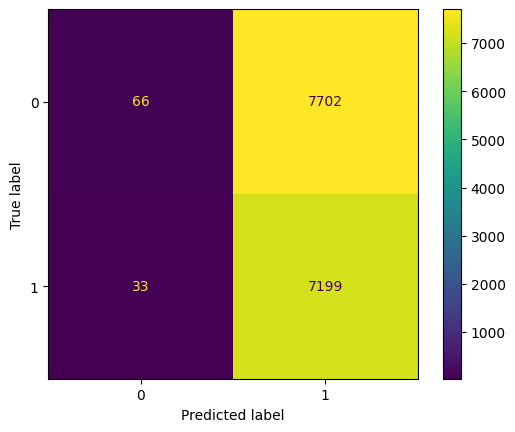

In [21]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2)], voting='hard')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.68      0.01      0.02      7664
           1       0.49      1.00      0.66      7336

    accuracy                           0.49     15000
   macro avg       0.58      0.50      0.34     15000
weighted avg       0.59      0.49      0.33     15000


 testing duration : 17.03173565864563 



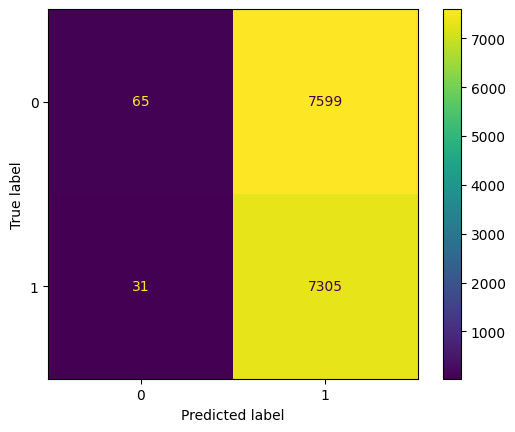

In [22]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Naive bayes & Decision tree

In [23]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulnvbs(var_smoothing=0.1)

mulgul_Mll2 = mulguldesi(criterion='gini',max_features='sqrt',splitter='best')

mulgul_Mll = mulgul_engvtg(estimators=[('NB', mulgul_Mll1), ('DT', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'hard'}
Best Score :  0.688


In [24]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 0.5800213813781738 

              precision    recall  f1-score   support

           0       0.51      0.88      0.65      7768
           1       0.45      0.10      0.17      7232

    accuracy                           0.51     15000
   macro avg       0.48      0.49      0.41     15000
weighted avg       0.48      0.51      0.42     15000


 validation duration : 0.3042271137237549 



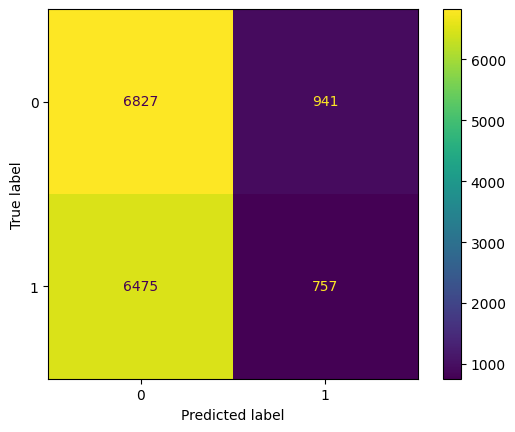

In [25]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('NB', mulgul_Mll1), ('DT', mulgul_Mll2)], voting='hard')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.51      0.87      0.64      7664
           1       0.45      0.11      0.18      7336

    accuracy                           0.50     15000
   macro avg       0.48      0.49      0.41     15000
weighted avg       0.48      0.50      0.41     15000


 testing duration : 0.30809783935546875 



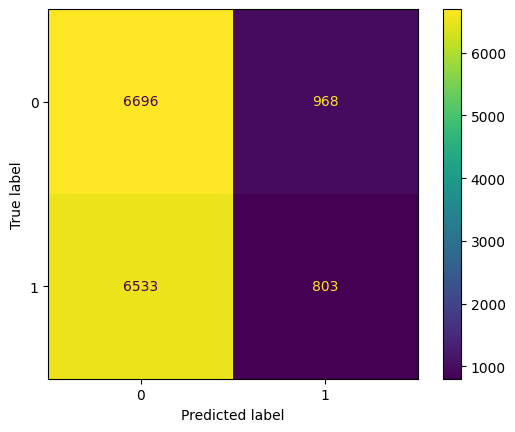

In [26]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Decision tree & Random forest

In [27]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulguldesi(criterion='gini',max_features='sqrt',splitter='best')

mulgul_Mll2 = mulgulromf(criterion='gini',max_features='sqrt',n_estimators=200)

mulgul_Mll = mulgul_engvtg(estimators=[('DT', mulgul_Mll1), ('RF', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'hard'}
Best Score :  0.7176666666666667


In [28]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 55.80881953239441 

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      7768
           1       0.63      0.00      0.01      7232

    accuracy                           0.52     15000
   macro avg       0.57      0.50      0.34     15000
weighted avg       0.57      0.52      0.36     15000


 validation duration : 0.5258035659790039 



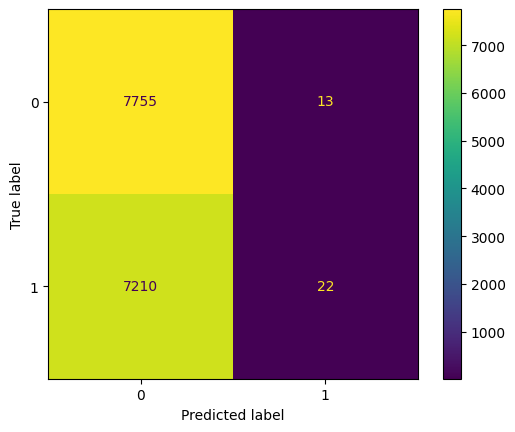

In [29]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('DT', mulgul_Mll1), ('RF', mulgul_Mll2)], voting='hard')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      7664
           1       0.80      0.01      0.01      7336

    accuracy                           0.51     15000
   macro avg       0.65      0.50      0.34     15000
weighted avg       0.65      0.51      0.35     15000


 testing duration : 0.532562255859375 



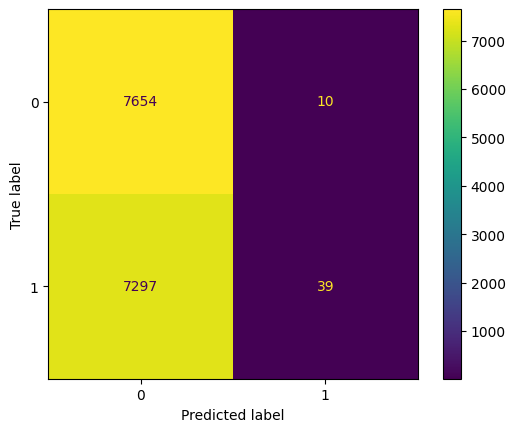

In [30]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Random forest & KNN

In [31]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulromf(criterion='gini',max_features='sqrt',n_estimators=200)

mulgul_Mll2 = mulgulkgh(algorithm='ball_tree',n_neighbors=9,weights='distance')

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'soft'}
Best Score :  0.792


In [32]:
mulgul_Bst_Mll.best_params_

{'voting': 'soft'}


 training duration : 55.48746204376221 

              precision    recall  f1-score   support

           0       0.62      0.39      0.48      7768
           1       0.53      0.75      0.62      7232

    accuracy                           0.56     15000
   macro avg       0.58      0.57      0.55     15000
weighted avg       0.58      0.56      0.55     15000


 validation duration : 103.4445571899414 



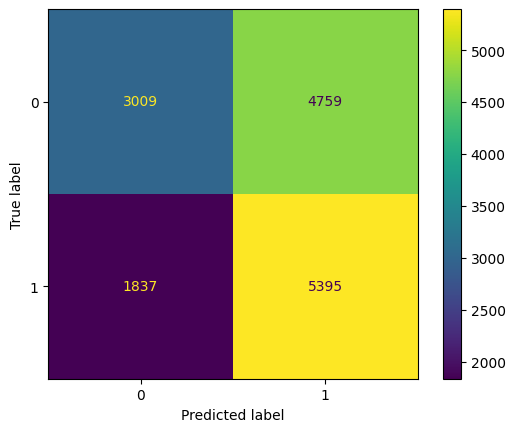

In [33]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2)], voting='soft')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.63      0.40      0.49      7664
           1       0.54      0.76      0.63      7336

    accuracy                           0.57     15000
   macro avg       0.59      0.58      0.56     15000
weighted avg       0.59      0.57      0.56     15000


 testing duration : 108.9041976928711 



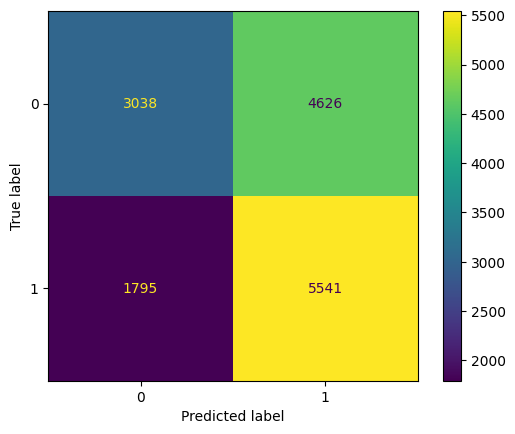

In [34]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### KNN & MLP

In [35]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulkgh(algorithm='ball_tree',n_neighbors=9,weights='distance')

mulgul_Mll2 = mulgulmlt(activation='tanh',learning_rate='constant',solver='lbfgs')

mulgul_Mll = mulgul_engvtg(estimators=[('KNN', mulgul_Mll1), ('MLP', mulgul_Mll2)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'soft'}
Best Score :  0.7863333333333333


In [36]:
mulgul_Bst_Mll.best_params_

{'voting': 'soft'}


 training duration : 135.48039412498474 

              precision    recall  f1-score   support

           0       0.68      0.12      0.20      7768
           1       0.50      0.94      0.65      7232

    accuracy                           0.51     15000
   macro avg       0.59      0.53      0.43     15000
weighted avg       0.59      0.51      0.42     15000


 validation duration : 107.93416357040405 



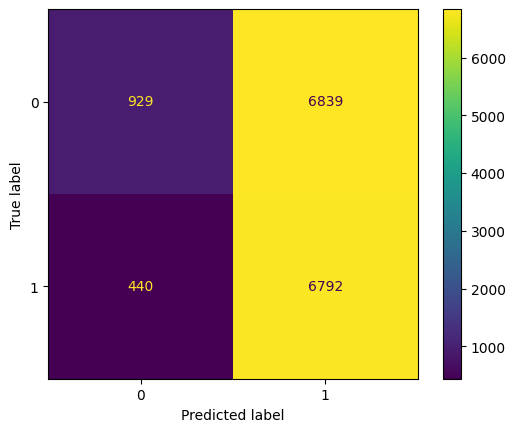

In [37]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('KNN', mulgul_Mll1), ('MLP', mulgul_Mll2)], voting='soft')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.68      0.11      0.19      7664
           1       0.50      0.94      0.66      7336

    accuracy                           0.52     15000
   macro avg       0.59      0.53      0.43     15000
weighted avg       0.59      0.52      0.42     15000


 testing duration : 105.41100287437439 



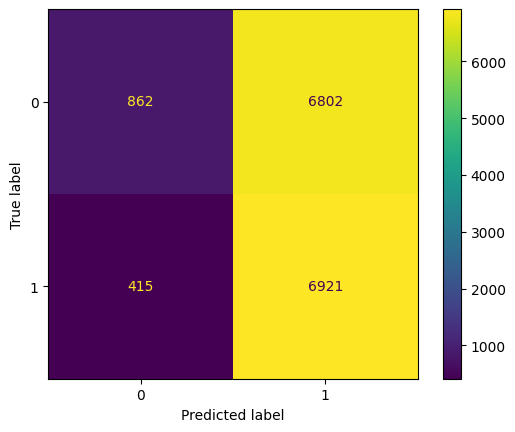

In [38]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### SVM, Naive bayes & Decision tree

In [39]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgul_engsvet(C=3.0,gamma='scale',kernel='poly')

mulgul_Mll2 = mulgulnvbs(var_smoothing=0.1)

mulgul_Mll3 = mulguldesi(criterion='gini',max_features='sqrt',splitter='best')

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2), ('DT', mulgul_Mll3)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'hard'}
Best Score :  0.7749999999999999


In [40]:
mulgul_Bst_Mll.best_params_

{'voting': 'hard'}


 training duration : 137.09803223609924 

              precision    recall  f1-score   support

           0       0.66      0.01      0.02      7768
           1       0.48      1.00      0.65      7232

    accuracy                           0.48     15000
   macro avg       0.57      0.50      0.33     15000
weighted avg       0.58      0.48      0.32     15000


 validation duration : 19.439772605895996 



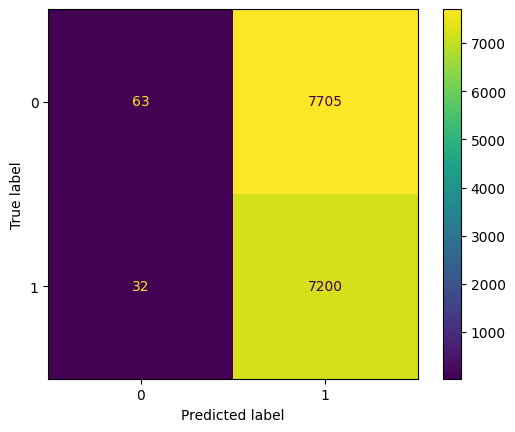

In [41]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('SVM', mulgul_Mll1), ('NB', mulgul_Mll2), ('DT', mulgul_Mll3)], voting='hard')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.69      0.01      0.02      7664
           1       0.49      1.00      0.66      7336

    accuracy                           0.49     15000
   macro avg       0.59      0.50      0.34     15000
weighted avg       0.59      0.49      0.33     15000


 testing duration : 17.551480770111084 



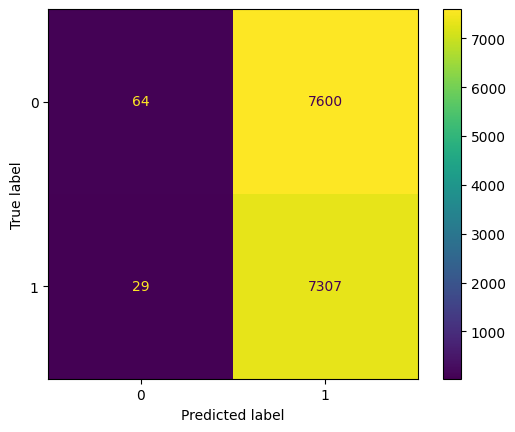

In [42]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Random forest, KNN & MLP

In [43]:
mulgul_Bst = {'voting': ['hard', 'soft']}

mulgul_Mll1 = mulgulromf(criterion='gini',max_features='sqrt',n_estimators=200)

mulgul_Mll2 = mulgulkgh(algorithm='ball_tree',n_neighbors=9,weights='distance')

mulgul_Mll3 = mulgulmlt(activation='tanh',learning_rate='constant',solver='lbfgs')

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2), ('MLP', mulgul_Mll3)])

mulgul_Bst_Mll = mulgul_enggri(mulgul_Mll, mulgul_Bst,
                         cv=2,
                         verbose=1)
mulgul_Bst_Mll.fit(mulgul_gerX[:3000],mulgul_gerY[:3000])

print("Best parameters-mulgul_ger :", mulgul_Bst_Mll.best_params_)
print("Best Score : ", mulgul_Bst_Mll.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters-mulgul_ger : {'voting': 'soft'}
Best Score :  0.792


In [44]:
mulgul_Bst_Mll.best_params_

{'voting': 'soft'}


 training duration : 200.21690392494202 

              precision    recall  f1-score   support

           0       0.66      0.16      0.26      7768
           1       0.50      0.91      0.65      7232

    accuracy                           0.52     15000
   macro avg       0.58      0.54      0.45     15000
weighted avg       0.59      0.52      0.45     15000


 validation duration : 120.46450138092041 



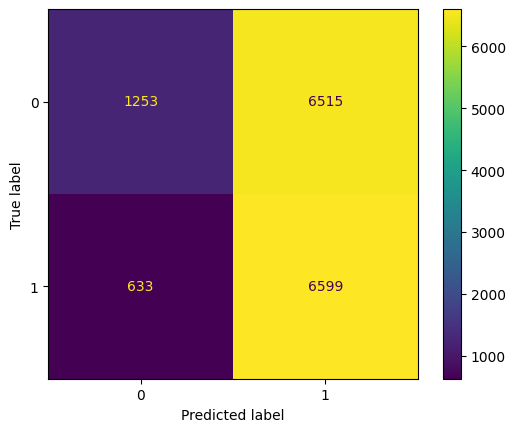

In [45]:
mul_pd1 = mulgul_engtim.time()

mulgul_Mll = mulgul_engvtg(estimators=[('RF', mulgul_Mll1), ('KNN', mulgul_Mll2), ('MLP', mulgul_Mll3)], voting='soft')
mulgul_Mll.fit(mulgul_gerX,mulgul_gerY)

mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXL)
print(mulgul_engcla(mulgul_engYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.67      0.16      0.26      7664
           1       0.51      0.92      0.66      7336

    accuracy                           0.53     15000
   macro avg       0.59      0.54      0.46     15000
weighted avg       0.59      0.53      0.45     15000


 testing duration : 114.6065080165863 



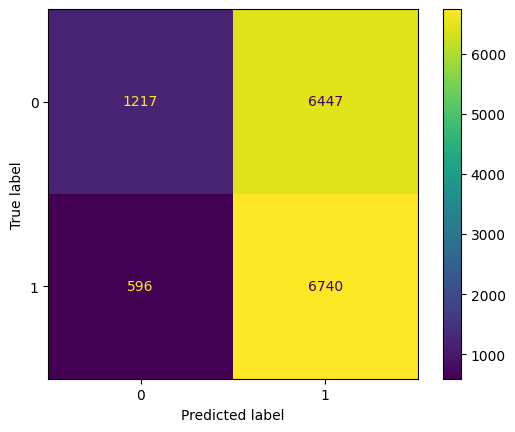

In [46]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll.predict(mulgul_engXE)
print(mulgul_engcla(mulgul_engYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_engYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")